# **STROKE PREDICTION**

The following are the columns in our dataset: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

-id

-gender

-age

-hypertension

-heart_disease

-ever married

-work_type

-Residence_type

-avg_glucose_level

-bmi

-smoking_status

-stroke


**Importing Necessary Libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


# for interactivity
import ipywidgets
from ipywidgets import interact

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
#from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVC, SVC
#from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, r2_score, classification_report
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OneHotEncoder

**Reading the Data**

In [ ]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.shape

(5110, 12)

There are 5110 rows and 12 columns in the dataset where stroke is the dependent variable

In [ ]:
#Checking Information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
#Type of Data
'''
 #   Column             Non-Null Count  Dtype     Numerical/Categorical
---  ------             --------------  -----  
 0   id                 5110 non-null   int64      Numerical Discrete
 1   gender             5110 non-null   object     Categorical
 2   age                5110 non-null   float64    Numerical Discrete
 3   hypertension       5110 non-null   int64      Categorical
 4   heart_disease      5110 non-null   int64      Categorical
 5   ever_married       5110 non-null   object     Categorical
 6   work_type          5110 non-null   object     Categorical
 7   Residence_type     5110 non-null   object     Categorical
 8   avg_glucose_level  5110 non-null   float64    Numerical Continuous
 9   bmi                4909 non-null   float64    Numerical Continuous 
 10  smoking_status     5110 non-null   object     Categorical
 11  stroke             5110 non-null   int64      Categorical
 '''

'\n #   Column             Non-Null Count  Dtype     Numerical/Categorical\n---  ------             --------------  -----  \n 0   id                 5110 non-null   int64      Numerical Discrete\n 1   gender             5110 non-null   object     Categorical\n 2   age                5110 non-null   float64    Numerical Discrete\n 3   hypertension       5110 non-null   int64      Categorical\n 4   heart_disease      5110 non-null   int64      Categorical\n 5   ever_married       5110 non-null   object     Categorical\n 6   work_type          5110 non-null   object     Categorical\n 7   Residence_type     5110 non-null   object     Categorical\n 8   avg_glucose_level  5110 non-null   float64    Numerical Continuous\n 9   bmi                4909 non-null   float64    Numerical Continuous \n 10  smoking_status     5110 non-null   object     Categorical\n 11  stroke             5110 non-null   int64      Categorical\n '

In [ ]:
#Removing id column as it is not of much importance
data.drop("id",inplace=True,axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#Checking for duplicates in the dataset

display("Total number of of Duplicates present in data: %s" %data.duplicated().sum())

'Total number of of Duplicates present in data: 0'

There are no duplicate records in the dataset

In [ ]:
#Checking for missing values in the dataset
print("Number of Missing Values in our data set\n")
missing_data = data.isnull().sum().to_frame().reset_index().rename({"index" : 'Variable', 0: 'Missing Values'}, axis =1)
display(missing_data.style.background_gradient('gnuplot2_r'))

Number of Missing Values in our data set



,Variable,Missing Values
0,gender,0
1,age,0
2,hypertension,0
3,heart_disease,0
4,ever_married,0
5,work_type,0
6,Residence_type,0
7,avg_glucose_level,0
8,bmi,201
9,smoking_status,0


There are 201 missing values in bmi column.

In [ ]:
#We will use mean to fill up missing values in Numerical Continuous columns
data['bmi'].fillna(data['bmi'].mean(), inplace = True)
#Checking Missing Values after imputing
display(data.isnull().sum().to_frame().reset_index().rename({'index' : 'Variables', 0: 'Missing Values'}, axis =1).style.background_gradient('copper_r'))

,Variables,Missing Values
0,gender,0
1,age,0
2,hypertension,0
3,heart_disease,0
4,ever_married,0
5,work_type,0
6,Residence_type,0
7,avg_glucose_level,0
8,bmi,0
9,smoking_status,0


The missing values are imputed with the mean of the column as it is numerical continuous

# **Data Description and Initial Cleaning**

In [ ]:
#Checking Statistics Summary of numerical columns
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Data Quality Analysis of the dataset**

Age -             Mean and mean are close so there may be no or less outliers.

Hypertension -    Mean and meadian are close so there may be no or less outliers.

Heart Disease - Mean and meadian are close so there may be no or less outliers.

Average Glucose Level -  Mean and meadian are not so close so there may be outliers.

BMI-            Mean and mean are nearly equal

stroke -          Mean and mean are nearly equal



In [ ]:
#Checking Summary of categorical columns
data.describe(include="object")

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


# **Handling Categorical Data**

In [ ]:
# If the data is Categorical, check with reference to domain whether the following parameters are valid or not:
#      1. Check the unique values.
#      2. Check if there are Spelling errors or not.
#      3. Check if any unusual category exists, if yes then remove it.

***Making List of Categorical Columns***

In [ ]:
#Making List of Categorical Columns

categorical = list(data.dtypes[data.dtypes == 'object'].index)
categorical
# Other methods 
# list(df.select_dtypes(include = 'O').columns)
# [col for col in df.columns if df[col].dtype == 'object']

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

***Cleaning Categorical Data in our dataset***

In [ ]:
#Cleaning Categorical Data in our data set

for col in categorical:
    data[col] = data[col].str.lower().str.replace(" ", "_")
    
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67.0,0,1,yes,private,urban,228.69,36.600000,formerly_smoked,1
1,female,61.0,0,0,yes,self-employed,rural,202.21,28.893237,never_smoked,1
2,male,80.0,0,1,yes,private,rural,105.92,32.500000,never_smoked,1
3,female,49.0,0,0,yes,private,urban,171.23,34.400000,smokes,1
4,female,79.0,1,0,yes,self-employed,rural,174.12,24.000000,never_smoked,1


***Unique values in Categorical Columns***

Unique Values in City Names

In [ ]:
#Checkin the unique values in categorical columns
for col in categorical:
    print(col)
    print(data[col].unique())
    print("Number of unique classes ",data[col].nunique())
    print('\n')

gender
['male' 'female' 'other']
Number of unique classes  3


ever_married
['yes' 'no']
Number of unique classes  2


work_type
['private' 'self-employed' 'govt_job' 'children' 'never_worked']
Number of unique classes  5


Residence_type
['urban' 'rural']
Number of unique classes  2


smoking_status
['formerly_smoked' 'never_smoked' 'smokes' 'unknown']
Number of unique classes  4




In [ ]:
#Dropping the unusual category from the dataset
data.drop(data.loc[data['smoking_status']=='unknown'].index, inplace=True)
data.shape

(3566, 11)

In [ ]:
#Resetting the index after removing the unusual category
data.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67.0,0,1,yes,private,urban,228.69,36.600000,formerly_smoked,1
1,female,61.0,0,0,yes,self-employed,rural,202.21,28.893237,never_smoked,1
2,male,80.0,0,1,yes,private,rural,105.92,32.500000,never_smoked,1
3,female,49.0,0,0,yes,private,urban,171.23,34.400000,smokes,1
4,female,79.0,1,0,yes,self-employed,rural,174.12,24.000000,never_smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
3561,female,57.0,0,0,yes,private,rural,77.93,21.700000,never_smoked,0
3562,female,80.0,1,0,yes,private,urban,83.75,28.893237,never_smoked,0
3563,female,81.0,0,0,yes,self-employed,urban,125.20,40.000000,never_smoked,0
3564,female,35.0,0,0,yes,self-employed,rural,82.99,30.600000,never_smoked,0


# **Handling Numerical Data**

In [ ]:
# If the data is CONTINOUS, check with reference to domain whether the following parameters are valid or not:
#      1. Negative Numbers are allowed or not.
#      2. Positive Numbers are allowed or not.
#      3. Decimals are allowed or just Integers are Expected.
# If the data is DISCRETE, check with reference to domain whether the following parameters are valid or not:
#      1. Negative Numbers are allowed or not.
#      2. Positive Numbers are allowed or not.
#      3. Decimals are allowed or just Integers are Expected.
#      4. Check whether the number falls in the specified Range defined by DOMAIN

In [ ]:
#Checking for negative values in Numerical Columns
numerical = [col for col in data.columns if col not in categorical]
for i in numerical:
    data[data[i]<0]
    print("Records with Negative values in %s : " %i,data[data[i]<0])
    print('\n')

Records with Negative values in age :  Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


Records with Negative values in hypertension :  Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


Records with Negative values in heart_disease :  Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


Records with Negative values in avg_glucose_level :  Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


Records with Negative values in bmi :  Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Res

In [ ]:
data[data['age']==0]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
data[data['avg_glucose_level']==0]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
data[data['bmi']==0]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


There are no negative values and 0 values in our dataset

# **Visualization**

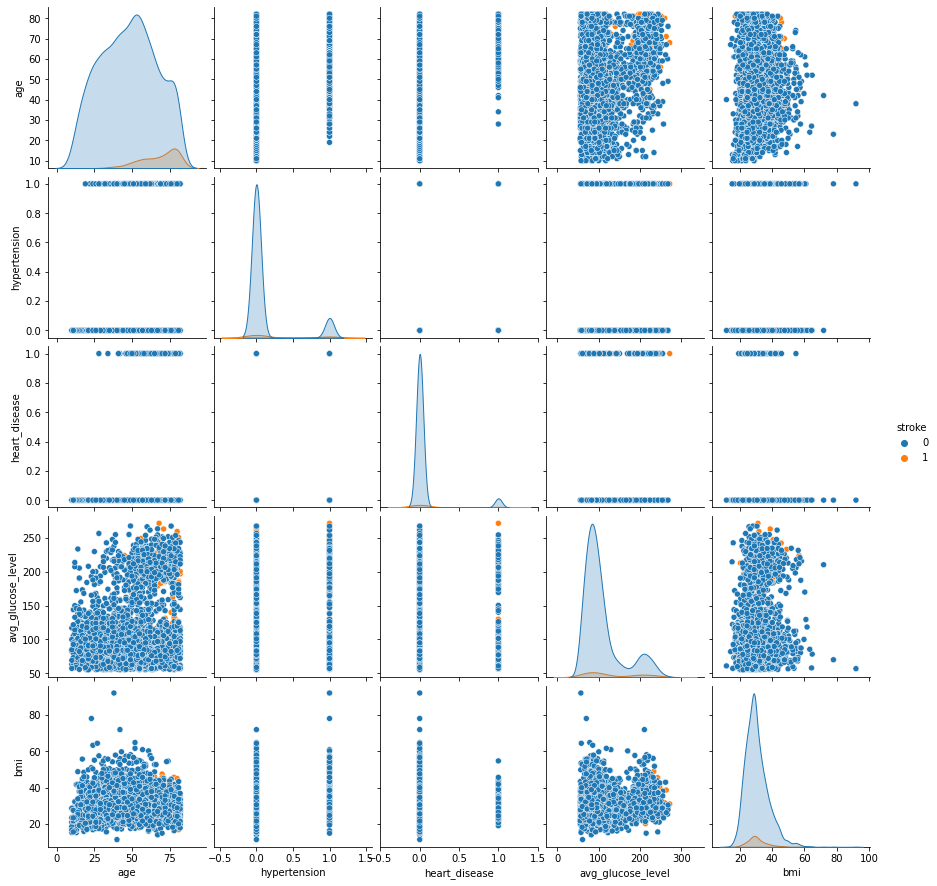

In [ ]:
#Checking the relationship between variables of data using pairplot
from matplotlib import pyplot  as plt
import seaborn as sns
sns.pairplot(data,diag_kind="kde",hue="stroke")

Through the pairplot, it seems that the datset is quite imbalanced and the classes are overlapping

In [ ]:
#Checking if the dataset is balanced or not
data.stroke.value_counts()

0    3364
1     202
Name: stroke, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Count')

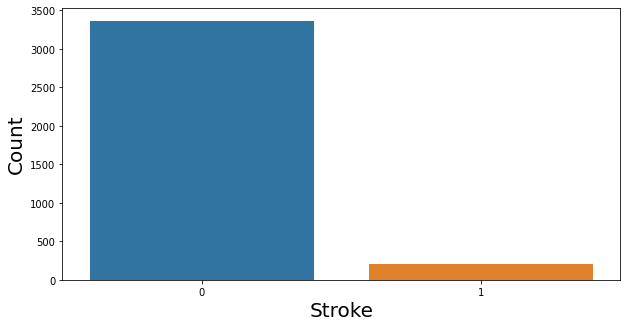

In [ ]:
stroke_label = data.stroke.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(stroke_label.index, stroke_label);
plt.xlabel('Stroke', fontsize=20);
plt.ylabel('Count', fontsize=20)

We can observe that two classes are highly imbalanced. It is better to resample the dataset to make it balanced and for proper prediction

**Resampling the classes to make it balanced**

In [ ]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = data[data.stroke==0]
df_2 = data[data.stroke==1]
 
# Upsample minority class
df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=3364,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_2_upsampled])
 
# Display new class counts
df_upsampled.stroke.value_counts()

1    3364
0    3364
Name: stroke, dtype: int64

In [ ]:
df_upsampled.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,58.0,1,0,yes,private,urban,87.96,39.2,never_smoked,0
1,female,70.0,0,0,yes,private,rural,69.04,35.9,formerly_smoked,0
2,female,52.0,0,0,yes,private,urban,77.59,17.7,formerly_smoked,0
3,female,75.0,0,1,yes,self-employed,rural,243.53,27.0,never_smoked,0
4,female,32.0,0,0,yes,private,rural,77.67,32.3,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
6723,female,70.0,0,1,yes,private,rural,239.07,26.1,never_smoked,1
6724,female,57.0,1,0,yes,govt_job,rural,67.41,32.9,never_smoked,1
6725,male,78.0,0,0,yes,self-employed,urban,116.10,27.1,never_smoked,1
6726,male,59.0,0,0,yes,private,urban,86.23,30.0,formerly_smoked,1


**Distribution of Stroke After Upsampling**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Count')

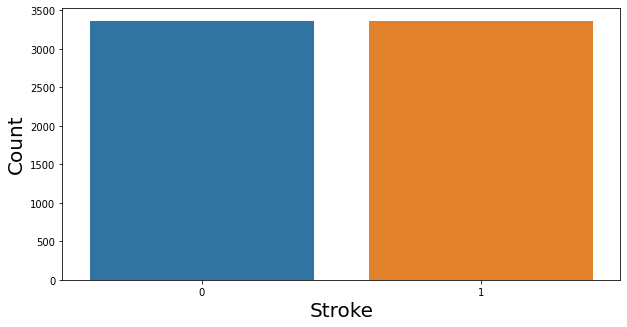

In [ ]:
stroke_label = df_upsampled.stroke.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(stroke_label.index, stroke_label);
plt.xlabel('Stroke', fontsize=20);
plt.ylabel('Count', fontsize=20)

Now the dataset is balanced.

In [ ]:
categorical = list(df_upsampled.dtypes[df_upsampled.dtypes == 'object'].index)
categorical

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



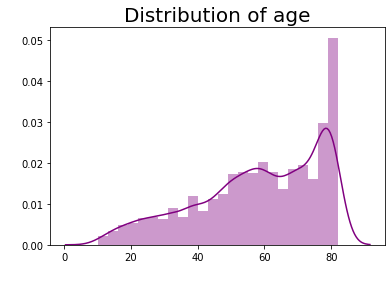

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



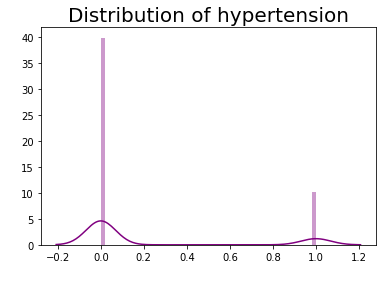

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



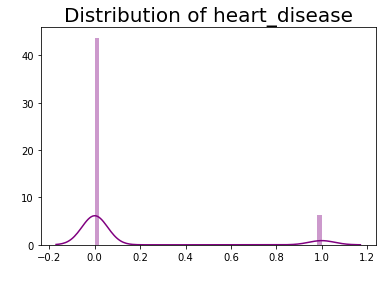

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



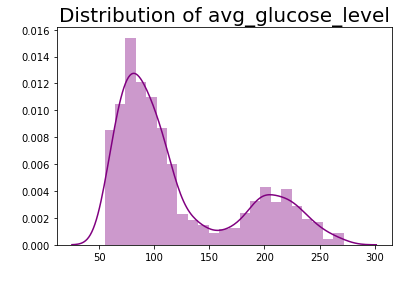

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



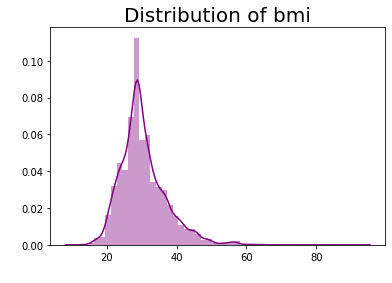

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



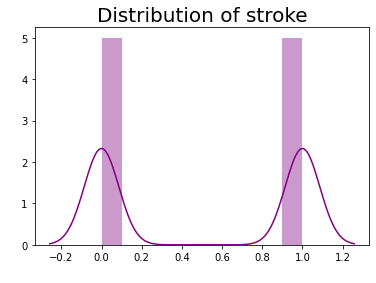

In [ ]:
numerical = [col for col in df_upsampled.columns if col not in categorical]
for i in numerical:
   
    ax = sns.distplot(df_upsampled[i], color = 'purple')
    plt.title("Distribution of %s" %i, fontsize = 20)
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.xticks(fontsize = 10)
    plt.show();
    print('\n')

The distribution of the columns are dataset are unimodel, bimodal and slightly skewed so there may be outliers in the data

In [ ]:
#Creating a function for ordering the groups in a column as per their frequency
def sort_order(column):
    orders = (df_upsampled.groupby([column]).mean().sort_values(by ='stroke', ascending = False)).index
    return orders

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



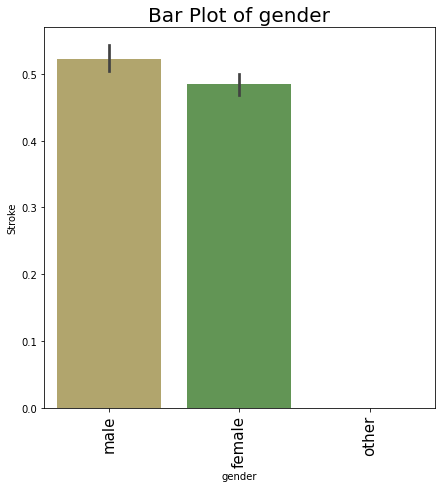

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



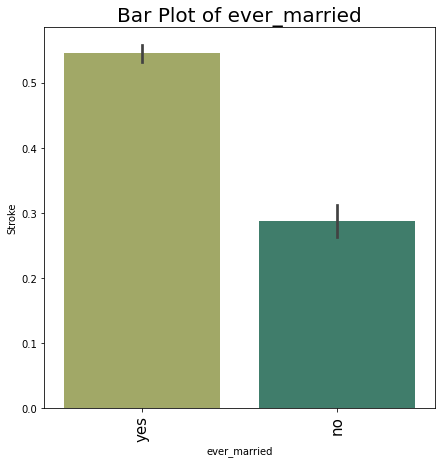

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



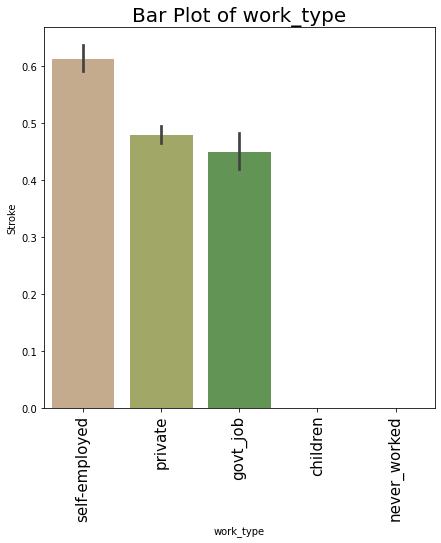

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



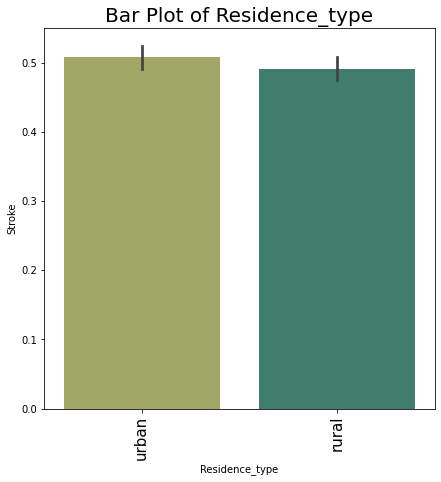

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



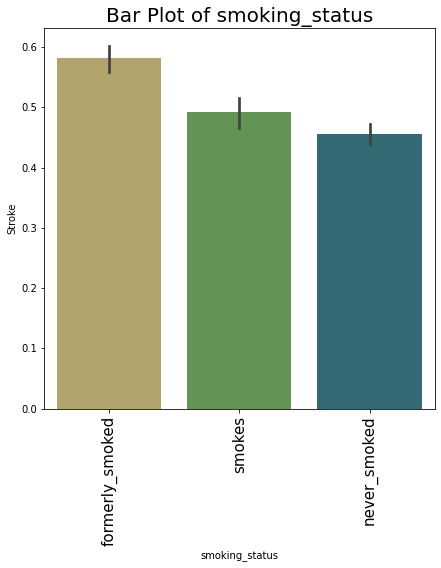

In [ ]:
#Looping over categorical variables to check the Price over different Groups
for i in categorical:
    if df_upsampled[i].nunique() < 20:
        f,ax=plt.subplots(figsize=(7,7))
        sns.barplot(df_upsampled[i],df_upsampled['stroke'], order = sort_order(i), palette='gist_earth_r')
        plt.title("Bar Plot of %s" %i, fontsize = 20)
        plt.xticks(fontsize = 12)
        plt.xlabel("%s"%i)
        plt.ylabel("Stroke")
        plt.xticks(fontsize = 15, rotation = 90)
        plt.show();
        print('\n')

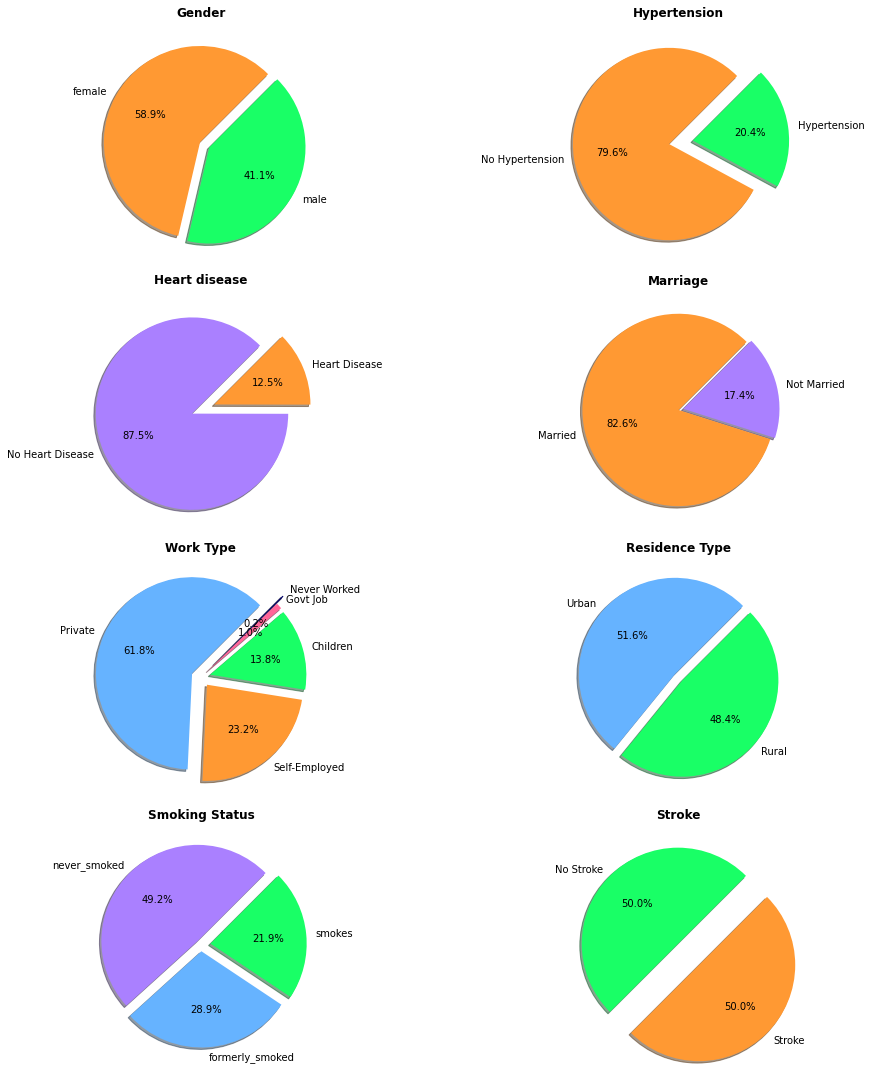

In [ ]:
fig, ax = plt.subplots(4,2, figsize = (15,15))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = df_upsampled['gender'].value_counts().index.tolist()[:2]
values = df_upsampled['gender'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#FF9933','#19FF66'],shadow=True, startangle=45,explode=[0.01, 0.1])
ax1.set_title("Gender", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Hypertension", "Hypertension"]
values = df_upsampled['hypertension'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#FF9933','#19FF66'],shadow=True,startangle=45,explode=[0.1, 0.15])
ax2.set_title("Hypertension", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Heart Disease", "Heart Disease"]
values = df_upsampled['heart_disease'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AA80FF','#FF9933'],shadow=True, startangle=45,explode=[0.1, 0.15])
ax3.set_title("Heart disease", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Married", "Not Married"]
values = df_upsampled['ever_married'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#FF9933','#AA80FF'],shadow=True,startangle=45,explode=[0, 0.05])
ax4.set_title("Marriage", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Private", "Self-Employed", "Children", "Govt Job", "Never Worked"]
values = df_upsampled['work_type'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#FF9933','#19FF66','#FF6699','#000066'],shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.1, 0.2])
ax5.set_title("Work Type", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Urban", "Rural"]
values = df_upsampled['Residence_type'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#19FF66'],shadow=True,startangle=45,explode=[0.05, 0.05])
ax6.set_title("Residence Type", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["never_smoked", "formerly_smoked", "smokes"]
values = df_upsampled['smoking_status'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.05, 0.07, 0.1],colors=['#AA80FF','#66b3ff','#19FF66','#FF6699'])
ax7.set_title("Smoking Status", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Stroke", "Stroke"]
values = df_upsampled['stroke'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.01, 0.3],colors=['#19FF66','#FF9933'])
ax8.set_title("Stroke", fontdict={'fontsize': 12},fontweight ='bold')

plt.tight_layout()
plt.show()

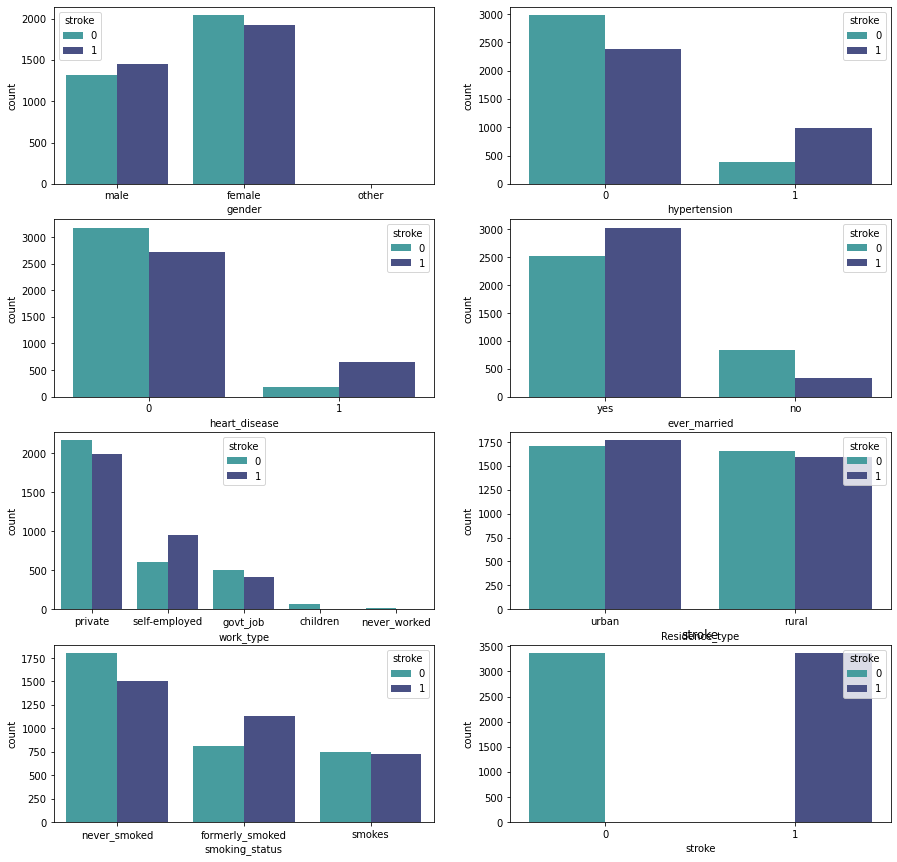

In [ ]:
df_st=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']
fig, axs = plt.subplots(4, 2, figsize=(15,15))
axs = axs.flatten()
for i, col_name in enumerate(df_st):
     
     sns.countplot(x=col_name, data=df_upsampled, ax=axs[i], hue =df_upsampled['stroke'],palette='mako_r')
     #ax.set_title(col_name, fontdict={'fontsize': 12},fontweight ='bold')
     plt.title(col_name)

In [ ]:
fig = make_subplots(
    rows=2, cols=2,subplot_titles=('','<b>Distribution Of Female Ages<b>','<b>Distribution Of Male Ages<b>','Residuals'),
    vertical_spacing=0.09,
    specs=[[{"type": "pie","rowspan": 2}       ,{"type": "histogram"}] ,
           [None                               ,{"type": "histogram"}]            ,                                      
          ]
)

fig.add_trace(
    go.Pie(values=df_upsampled.gender.value_counts().values,labels=['<b>Female<b>','<b>Male<b>','<b>Other<b>'],hole=0.3,pull=[0,0.08,0.3],marker_colors=['pink','lightblue','green'],textposition='inside'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(
        x=df_upsampled.query('gender=="female"').age,marker= dict(color='pink'),name='Female Ages'
    ),
    row=1, col=2
)


fig.add_trace(
    go.Histogram(
        x=df_upsampled.query('gender=="male"').age,marker= dict(color='lightblue'),name='Male Ages'
    ),
    row=2, col=2
)


fig.update_layout(
    height=800,
    showlegend=True,
    title_text="<b>Age-Sex Inference<b>",
)

fig.show()

There are slightly more females in our sample data than males and from a visual perspective, the ages seem to be normally distributed but with a high variance measure due to the visible fat tail.

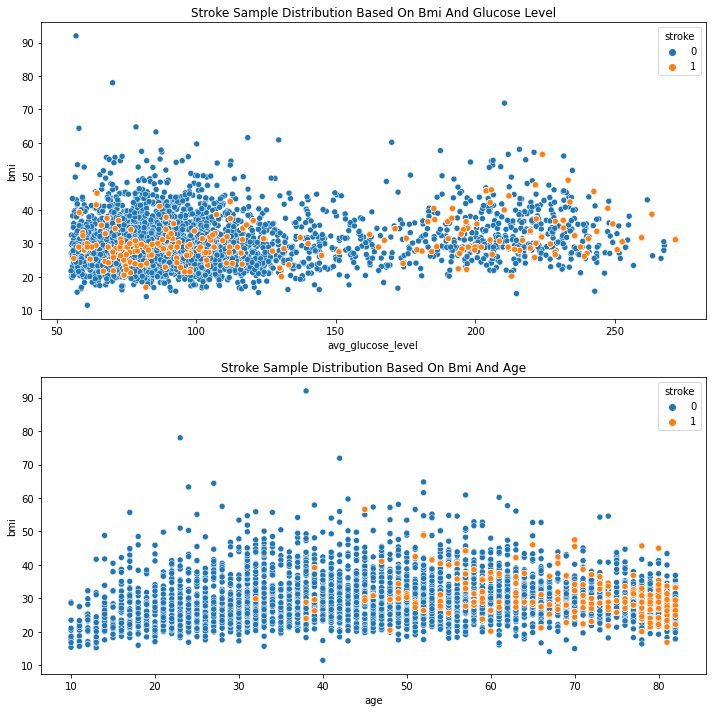

In [ ]:
fig=plt.subplots(figsize=(10,10))
plt.subplot(2,1,1)

plt.title('Stroke Sample Distribution Based On Bmi And Glucose Level')
sns.scatterplot(x=df_upsampled['avg_glucose_level'],y=df_upsampled['bmi'],hue=df_upsampled['stroke'])
plt.subplot(2,1,2)

plt.title('Stroke Sample Distribution Based On Bmi And Age')
sns.scatterplot(x=df_upsampled['age'],y=df_upsampled['bmi'],hue=df_upsampled['stroke'])
plt.tight_layout()
plt.show()

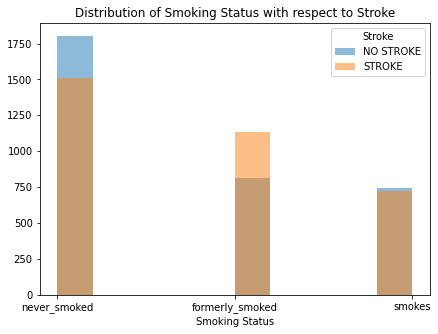

In [ ]:
#Distribution of Smoking Status with respect to Stroke
plt.figure(figsize=(7, 5))
plt.hist("smoking_status", data = df_upsampled[df_upsampled["stroke"] ==0], alpha = 0.5, label = "NO STROKE")
plt.hist("smoking_status", data = df_upsampled[df_upsampled["stroke"] == 1], alpha = 0.5, label = "STROKE")
plt.title("Distribution of Smoking Status with respect to Stroke")
plt.xlabel("Smoking Status")
plt.legend(title = "Stroke")
plt.show()

The dataset has more number of samples of people who don't smoke. This graph shows that stroke tendency is high if a person smokes

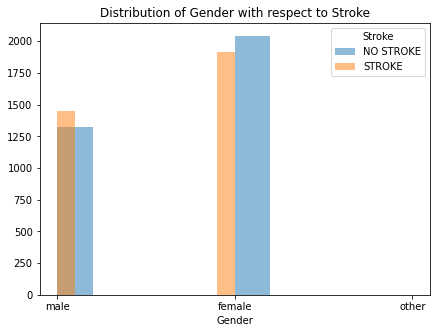

In [ ]:
#Distribution of Gender with respect to Stroke
plt.figure(figsize=(7, 5))
plt.hist("gender", data = df_upsampled[df_upsampled["stroke"] == 0], alpha = 0.5, label = "NO STROKE")
plt.hist("gender", data = df_upsampled[df_upsampled["stroke"] == 1], alpha = 0.5, label = "STROKE")
plt.title("Distribution of Gender with respect to Stroke")
plt.xlabel("Gender")
plt.legend(title = "Stroke")
plt.show()

The number of females are more in this dataset and stroke occurs more in case of males

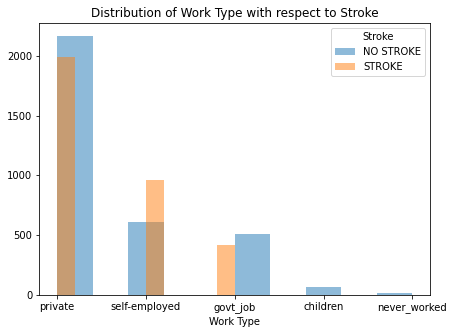

In [ ]:
#Distribution of Work Type with respect to Stroke
plt.figure(figsize=(7, 5))
plt.hist("work_type", data = df_upsampled[df_upsampled["stroke"] == 0], alpha = 0.5, label = "NO STROKE")
plt.hist("work_type", data = df_upsampled[df_upsampled["stroke"] == 1], alpha = 0.5, label = "STROKE")
plt.title("Distribution of Work Type with respect to Stroke")
plt.xlabel("Work Type")
plt.legend(title = "Stroke")
plt.show()

The samples of people working in private sector is more in this dataset. Comparatively the proportion of people having more stroke is when they are in private sector

**Correlation Matrix**

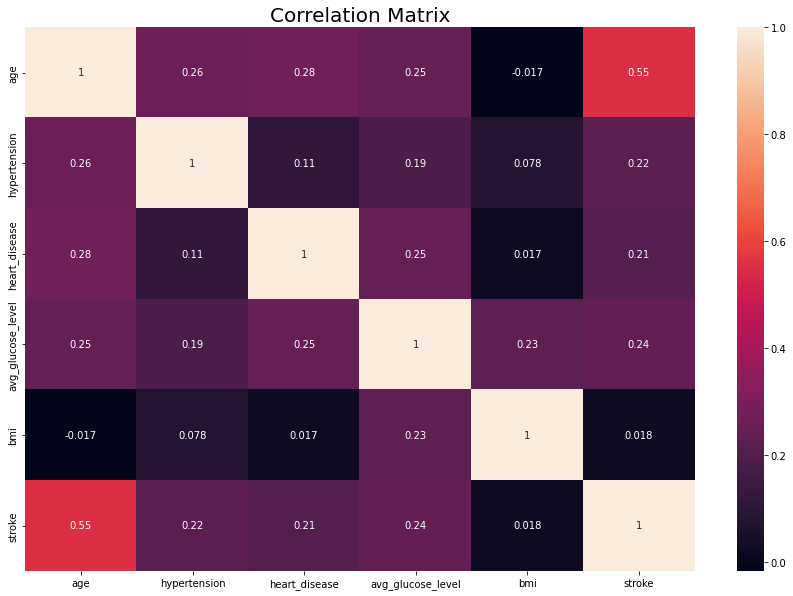

In [ ]:
#checking correlation between the variables
plt.figure(figsize=(15, 10))
sns.heatmap(df_upsampled.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

It seems that age, avg glucose level,hypertension, heat disease are important features here and there is no multicollinearity

In [ ]:
#Sorting feature according to their importance
df_upsampled.corr()['stroke'].sort_values(ascending=False)[1:]

age                  0.552926
avg_glucose_level    0.243592
hypertension         0.222813
heart_disease        0.208769
bmi                  0.017926
Name: stroke, dtype: float64

# **Outlier Analysis and Removal**

In [ ]:
#OUTLIER DETECTION in CROP
#Function to calc lowerRange and UpperRange using 1.5IQR rule
def outlier(data1):
    #Sort in Ascending
    sorted(data1)
    #Q1 and Q3
    Q1,Q3 = np.nanpercentile(data1, [25,75])
    #Calc IQR
    IQR = Q3 - Q1
    #Calc lowerRange
    lowerRange = Q1 - (1.5 * IQR)
    #Calc upperRange
    upperRange = Q3 + (1.5 * IQR)
    #Return Ranges
    return lowerRange,upperRange

In [ ]:
#Checking how outlier removal affected dataset
df_upsampled.value_counts('stroke')

stroke
1    3364
0    3364
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



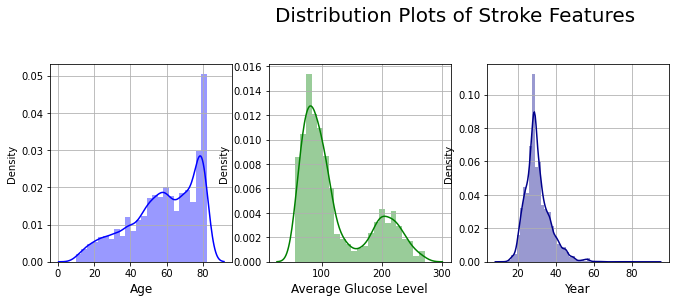

In [ ]:
#Distribution for important Stroke Features before removing ouliers
plt.figure(figsize=(15,8))
plt.subplot(2,4,1)
sns.distplot(df_upsampled['age'],color = 'blue')
plt.xlabel('Age',fontsize = 12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(df_upsampled['avg_glucose_level'],color = 'green')
plt.xlabel('Average Glucose Level',fontsize = 12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(df_upsampled['bmi'],color = 'darkblue')
plt.xlabel('Year',fontsize = 12)
plt.grid()

plt.suptitle('Distribution Plots of Stroke Features', fontsize = 20)
plt.show()

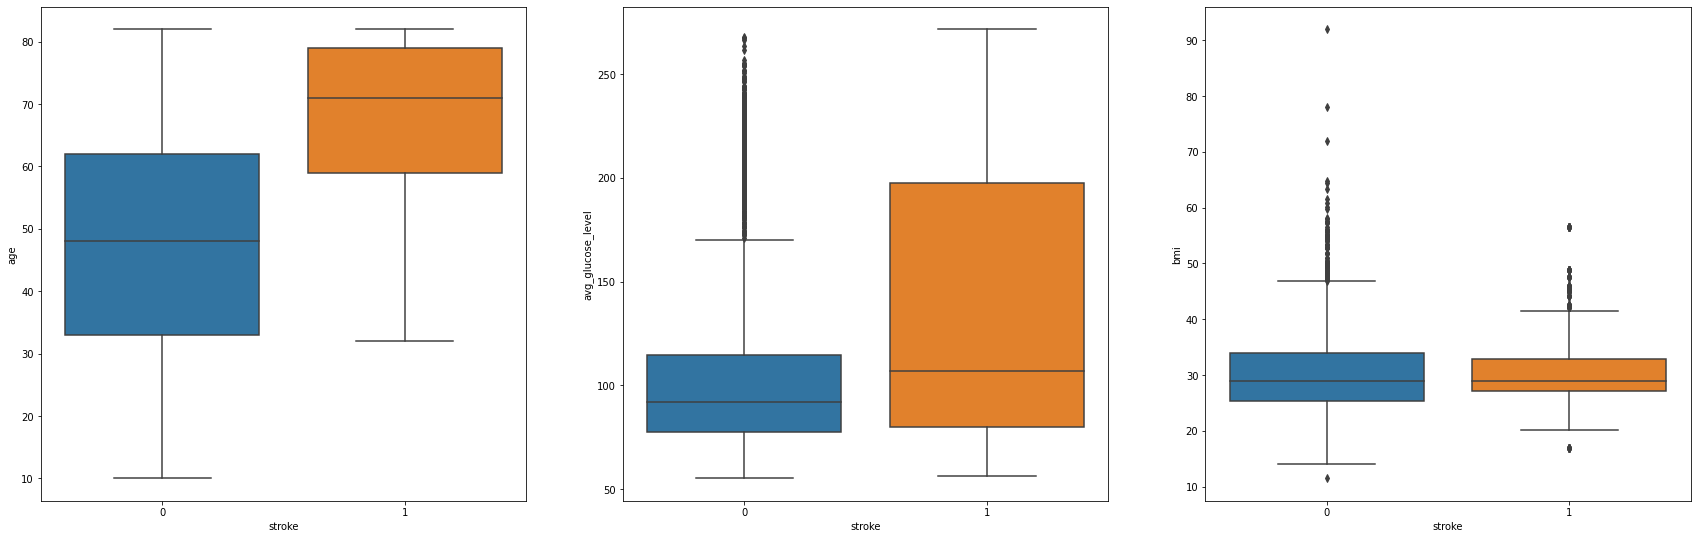

In [ ]:
#Checking the outliers considering all classes of the output for each numerical column
def graph(y):
    sns.boxplot(x="stroke", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('age')
  
plt.subplot(2,4,2)
graph('avg_glucose_level')
  
plt.subplot(2,4,3)
graph('bmi')
  
plt.show()

In [ ]:
lr,ur=outlier(df_upsampled['avg_glucose_level'][df_upsampled.stroke==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level > ur) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level < lr) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    3364
0    2916
dtype: int64

In [ ]:
lr,ur=outlier(df_upsampled['avg_glucose_level'][df_upsampled.stroke==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level > ur) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level < lr) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    3364
0    2831
dtype: int64

In [ ]:
lr,ur=outlier(df_upsampled['bmi'][df_upsampled.stroke==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi > ur) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi < lr) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    3177
0    2831
dtype: int64

In [ ]:
lr,ur=outlier(df_upsampled['bmi'][df_upsampled.stroke==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi > ur) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi < lr) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    3177
0    2499
dtype: int64

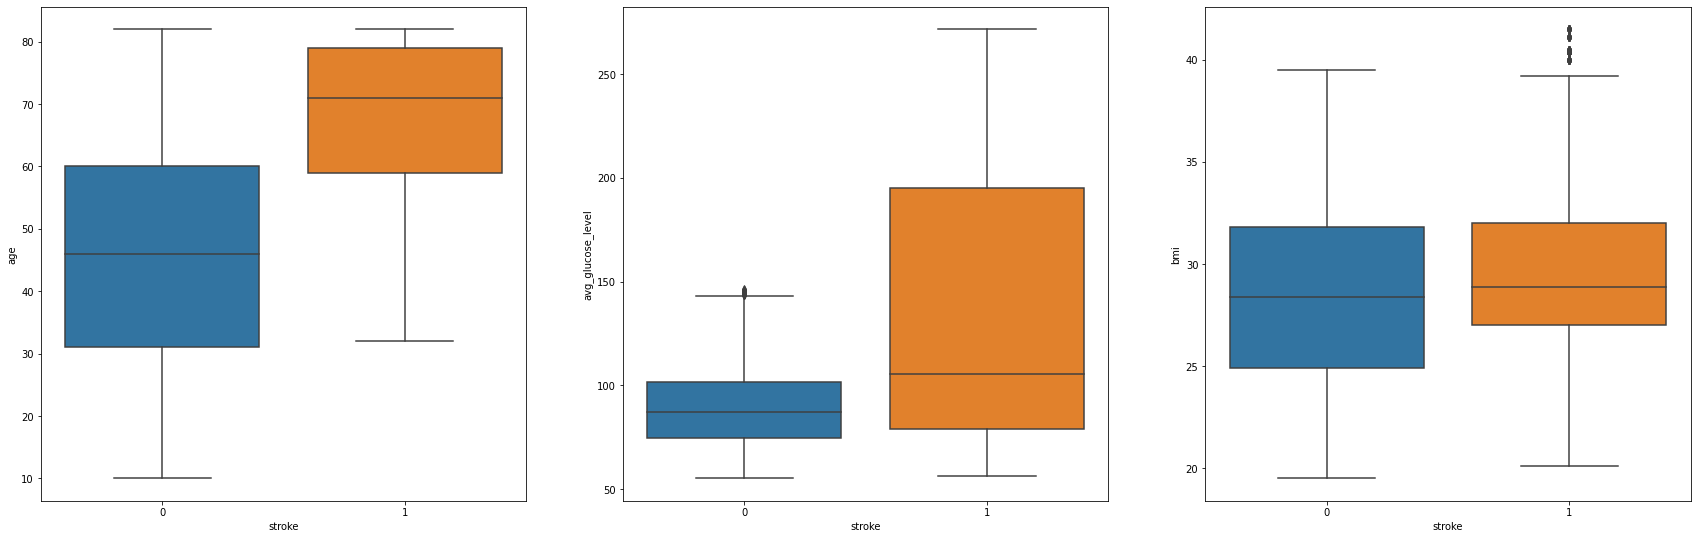

In [ ]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="stroke", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('age')
  
plt.subplot(2,4,2)
graph('avg_glucose_level')
  
plt.subplot(2,4,3)
graph('bmi')
  
plt.show()

In [ ]:
lr,ur=outlier(df_upsampled['bmi'][df_upsampled.stroke==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi > ur) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi < lr) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    3076
0    2499
dtype: int64

In [ ]:
lr,ur=outlier(df_upsampled['avg_glucose_level'][df_upsampled.stroke==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level > ur) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level < lr) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    3076
0    2477
dtype: int64

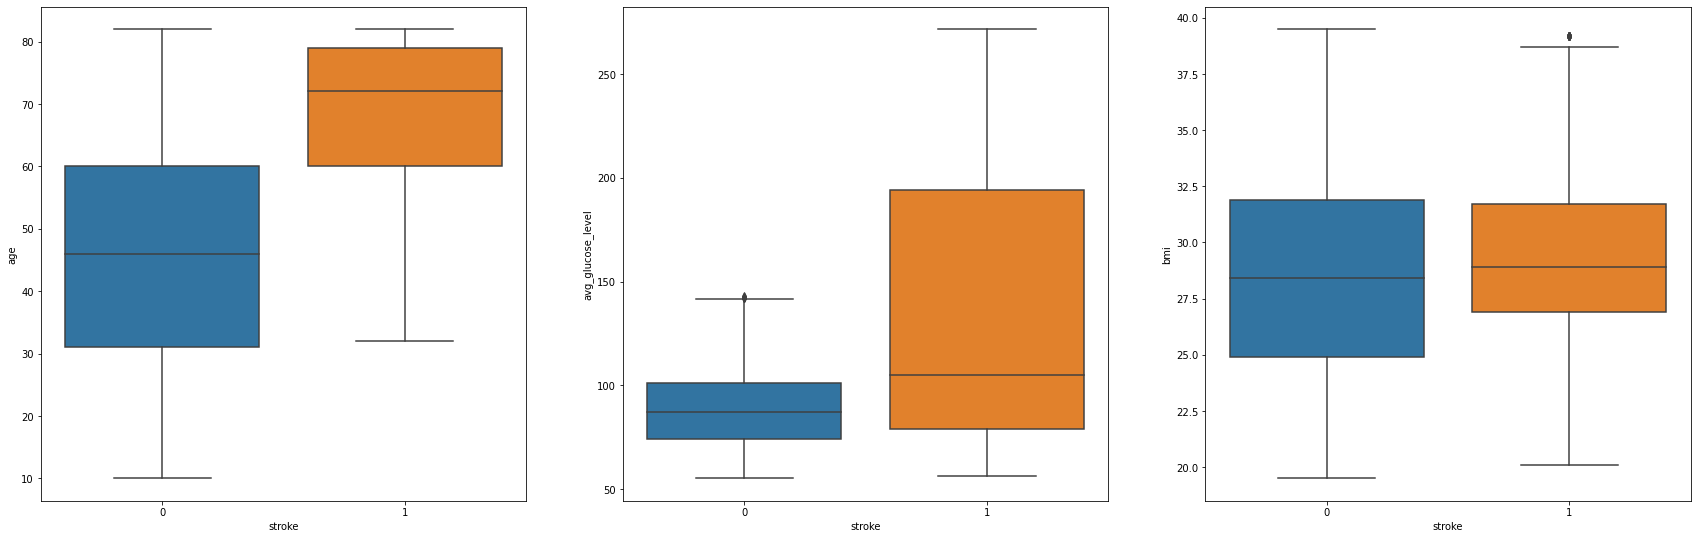

In [ ]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="stroke", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('age')
  
plt.subplot(2,4,2)
graph('avg_glucose_level')
  
plt.subplot(2,4,3)
graph('bmi')
  
plt.show()

In [ ]:
lr,ur=outlier(df_upsampled['avg_glucose_level'][df_upsampled.stroke==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level > ur) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level < lr) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    3076
0    2470
dtype: int64

In [ ]:
lr,ur=outlier(df_upsampled['bmi'][df_upsampled.stroke==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi > ur) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi < lr) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    3057
0    2470
dtype: int64

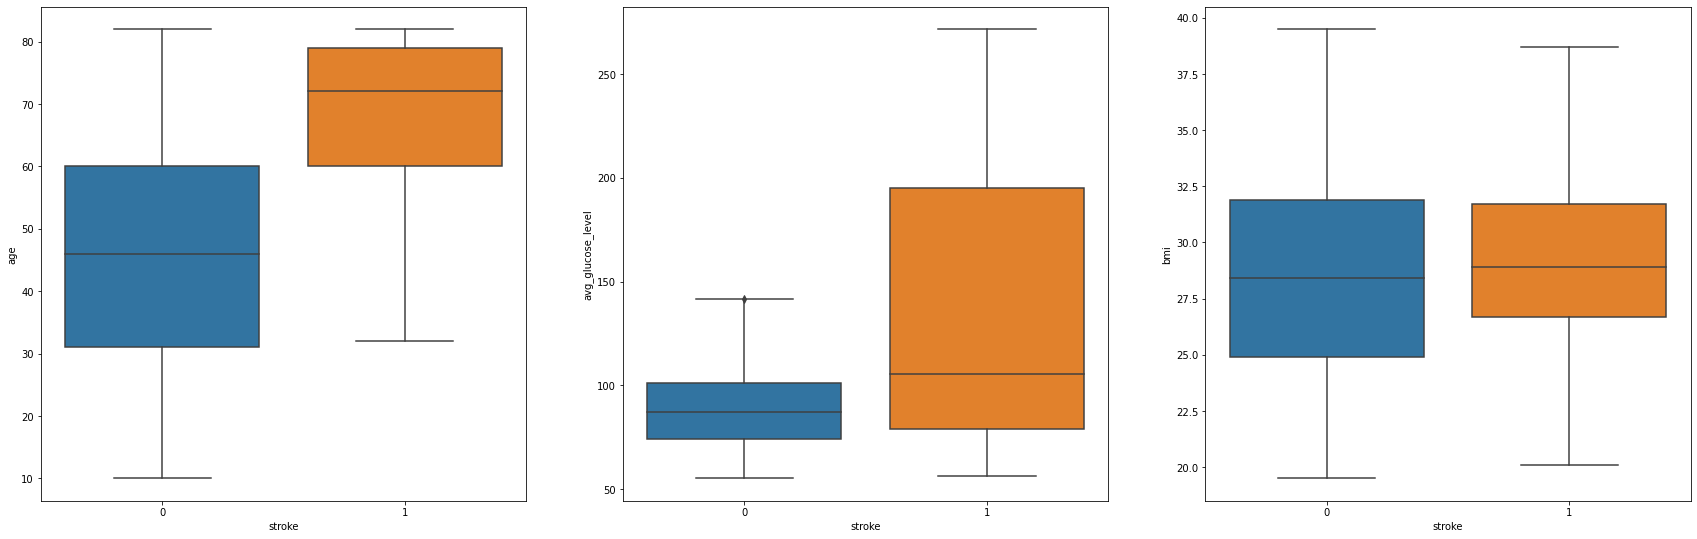

In [ ]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="stroke", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('age')
  
plt.subplot(2,4,2)
graph('avg_glucose_level')
  
plt.subplot(2,4,3)
graph('bmi')
  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



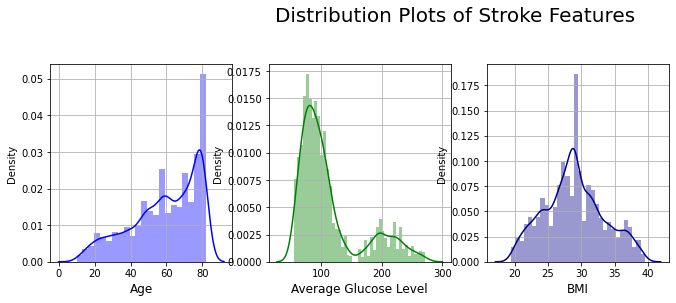

In [ ]:
#Distribution for important Stroke Features after outlier removal
plt.figure(figsize=(15,8))
plt.subplot(2,4,1)
sns.distplot(df_upsampled['age'],color = 'blue')
plt.xlabel('Age',fontsize = 12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(df_upsampled['avg_glucose_level'],color = 'green')
plt.xlabel('Average Glucose Level',fontsize = 12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(df_upsampled['bmi'],color = 'darkblue')
plt.xlabel('BMI',fontsize = 12)
plt.grid()

plt.suptitle('Distribution Plots of Stroke Features', fontsize = 20)
plt.show()

We can see that after removal of outlier, the distribution of columns is less skewed now.

In [ ]:
#Resetting the index after outlier removal
df_upsampled.reset_index(drop=True,inplace=True)
df_upsampled

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,58.0,1,0,yes,private,urban,87.96,39.2,never_smoked,0
1,female,70.0,0,0,yes,private,rural,69.04,35.9,formerly_smoked,0
2,female,32.0,0,0,yes,private,rural,77.67,32.3,smokes,0
3,male,79.0,0,1,yes,private,urban,57.08,22.0,formerly_smoked,0
4,female,37.0,0,0,yes,private,rural,73.50,26.1,formerly_smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
5522,female,70.0,0,1,yes,private,rural,239.07,26.1,never_smoked,1
5523,female,57.0,1,0,yes,govt_job,rural,67.41,32.9,never_smoked,1
5524,male,78.0,0,0,yes,self-employed,urban,116.10,27.1,never_smoked,1
5525,male,59.0,0,0,yes,private,urban,86.23,30.0,formerly_smoked,1


**Performing Label Encoding for the Categorical Columns**

In [ ]:
# label encoding all the categories data and getting final dataset
final=pd.get_dummies(df_upsampled, columns=['gender','ever_married','work_type','Residence_type','smoking_status'])
final

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_female,gender_male,ever_married_no,ever_married_yes,work_type_children,work_type_govt_job,work_type_never_worked,work_type_private,work_type_self-employed,Residence_type_rural,Residence_type_urban,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,58.0,1,0,87.96,39.2,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0
1,70.0,0,0,69.04,35.9,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0
2,32.0,0,0,77.67,32.3,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1
3,79.0,0,1,57.08,22.0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
4,37.0,0,0,73.50,26.1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5522,70.0,0,1,239.07,26.1,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0
5523,57.0,1,0,67.41,32.9,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0
5524,78.0,0,0,116.10,27.1,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0
5525,59.0,0,0,86.23,30.0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0


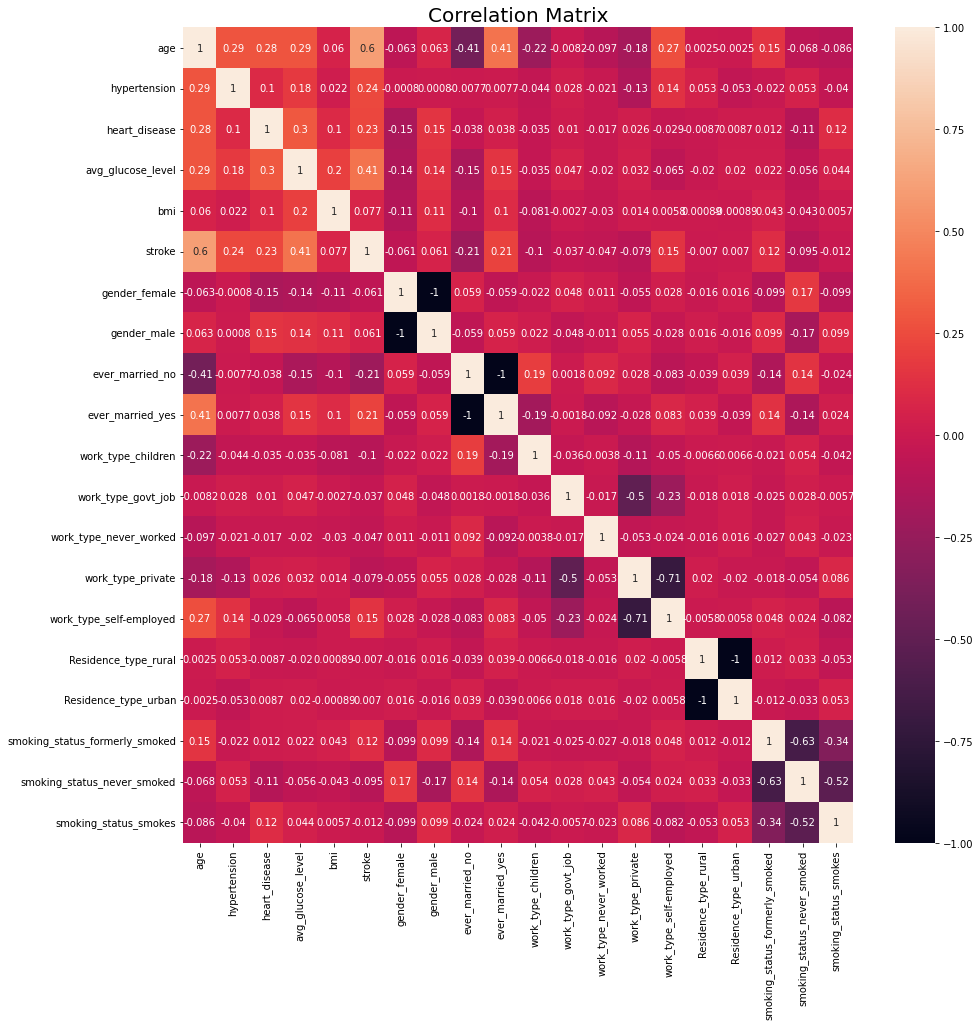

In [ ]:
#Correlation of all features after label encoding
plt.figure(figsize=(15, 15))
sns.heatmap(final.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

In [ ]:
feature_final=final[['age','hypertension',	'heart_disease',	'avg_glucose_level',	'bmi',	'gender_female','gender_male','ever_married_no',	'ever_married_yes',	'work_type_children',	'work_type_govt_job',	'work_type_never_worked',	'work_type_private',	'work_type_self-employed',	'Residence_type_rural',	'Residence_type_urban',	'smoking_status_formerly_smoked',	'smoking_status_never_smoked',	'smoking_status_smokes']]

# **Feature Selection using correlation and Classification Models**

In [ ]:
#Checking for importances of all features
final.corr()['stroke'].sort_values(ascending=False)[1:]

age                               0.602633
avg_glucose_level                 0.411051
hypertension                      0.239755
heart_disease                     0.230999
ever_married_yes                  0.213544
work_type_self-employed           0.145387
smoking_status_formerly_smoked    0.115834
bmi                               0.076607
gender_male                       0.061181
Residence_type_urban              0.007043
Residence_type_rural             -0.007043
smoking_status_smokes            -0.012062
work_type_govt_job               -0.036871
work_type_never_worked           -0.047364
gender_female                    -0.061181
work_type_private                -0.079183
smoking_status_never_smoked      -0.095027
work_type_children               -0.099659
ever_married_no                  -0.213544
Name: stroke, dtype: float64

**Checking Feature Importance using Gradient Boosting and Random Forest Classifier**

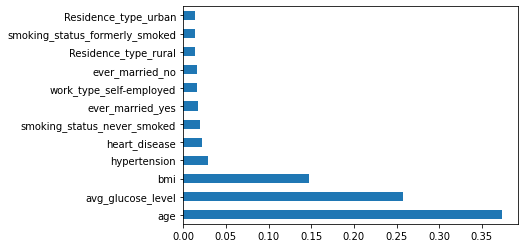

In [ ]:
#Checking the importance of features using Random Forest Classifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
rf = RandomForestClassifier()
rf_model=rf.fit(feature_final,target)
feat_importances = pd.Series(rf_model.feature_importances_, index=feature_final.columns)
feat_importances.nlargest(12).plot(kind='barh')

BMI, Age and Average Glucose Level seems most important features through Random Forest Classifier

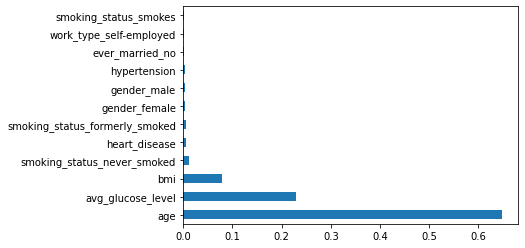

In [ ]:
##Checking the importance of features using Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb_model=gb.fit(feature_final,target)
feat_importances1 = pd.Series(gb_model.feature_importances_, index=feature_final.columns)
feat_importances1.nlargest(12).plot(kind='barh')


BMI, Age and Average Glucose Level seems most important features through Gradient Boosting Classifier

**Checking for importance of Features acquired through Correlation matrix**

In [ ]:
Corr_features = final[['age', 'avg_glucose_level', 'bmi','heart_disease','hypertension','ever_married_yes','work_type_self-employed','smoking_status_formerly_smoked']]

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
rf.fit(Corr_features,target)
gb.fit(Corr_features,target)
print(gb.feature_importances_)
print(rf.feature_importances_)

[0.64450662 0.23861919 0.09422254 0.00658634 0.00356018 0.00385935
 0.00225845 0.00638733]
[0.39553716 0.30306873 0.18626131 0.02118974 0.03158157 0.02415619
 0.02016244 0.01804286]


So the conclusion is that BMI, Average Glucose Level and BMI are the most important features and should be considered for Prediction

# **Prediction**

In [ ]:
final_features=final[['age', 'avg_glucose_level', 'bmi']]
target = final['stroke']

In [ ]:
#Scaling the features using MinMax Scalar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(final_features,target,test_size = 0.2,random_state =2)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train.shape

(4421, 3)

In [ ]:
X_test.shape

(1106, 3)

In [ ]:
y_train.shape

(4421,)

In [ ]:
y_test.shape

(1106,)

# **Classification Model Selection**

**Logistic Regfression**

In [ ]:
log_reg = LogisticRegression(C=0.1, max_iter=100000).fit(X_train_scaled, y_train)
log_reg_pred= log_reg.score(X_test_scaled, y_test)

print("Training score: {:.3f}".format(log_reg.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(log_reg.score(X_test_scaled, y_test)))

log_reg_train_accuracy = log_reg.score(X_train_scaled,y_train)
log_reg_accuracy = log_reg.score(X_test_scaled,y_test)

pred_prob_log_reg = log_reg.predict_proba(X_test_scaled)

#print("Training score: {:.3f}".format(log_reg.score(X_train_scaled, y_train)))
#print("Test score: {:.3f}".format(log_reg.score(X_test_scaled, y_test)))

Training score: 0.795
Test score: 0.802


**Confusion Matrix for Logistic Regression**

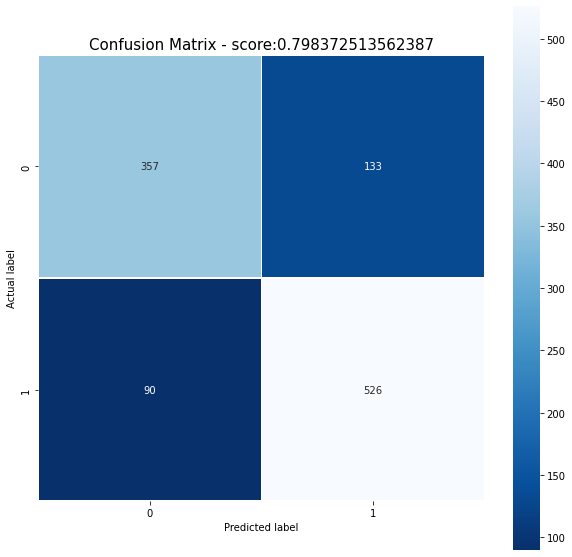

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       490
           1       0.80      0.85      0.83       616

    accuracy                           0.80      1106
   macro avg       0.80      0.79      0.79      1106
weighted avg       0.80      0.80      0.80      1106



In [ ]:
log_reg_model=LogisticRegression(random_state=0)
log_reg_model.fit(X_train_scaled,y_train)
y_pred=log_reg_model.predict(X_test_scaled)
from sklearn import metrics

log_reg_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(log_reg_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

**Decision Tree Classifier**

In [ ]:
tree = DecisionTreeClassifier(max_depth=20,random_state=0).fit(X_train_scaled, y_train)
print(tree.feature_importances_)
tree_pred= tree.score(X_test_scaled, y_test)

tree_train_accuracy =tree.score(X_train_scaled,y_train)
tree_accuracy = tree.score(X_test_scaled,y_test)
pred_prob_tree = tree.predict_proba(X_test_scaled)

print("Training score: {:.3f}".format(tree.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(tree.score(X_test_scaled, y_test)))

[0.48638985 0.3415849  0.17202526]
Training score: 1.000
Test score: 0.976


**Confusion Matrix using Decision Tree Classifier**

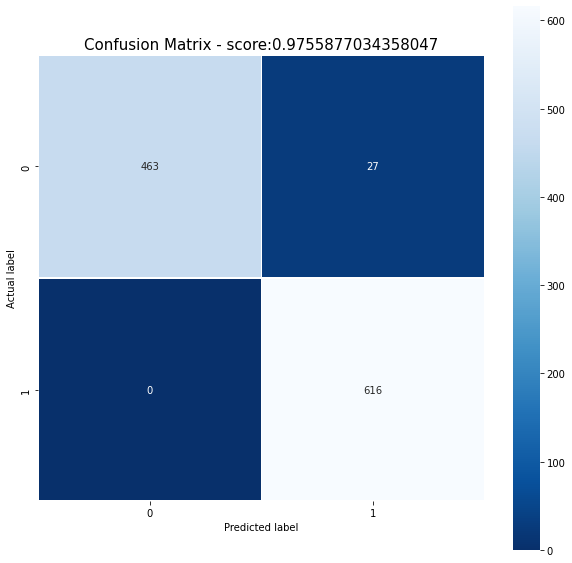

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       490
           1       0.96      1.00      0.98       616

    accuracy                           0.98      1106
   macro avg       0.98      0.97      0.98      1106
weighted avg       0.98      0.98      0.98      1106



In [ ]:
tree_model=DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train_scaled,y_train)
y_pred=tree_model.predict(X_test_scaled)
from sklearn import metrics

tree_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(tree_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

**Random Forest Classifier**

In [ ]:
#max features and n_estimator are important to fine tune otherwise trees will be densely graphed which will be a classic case of overfitting.
#max_features=4 and n_estimators=10 gives pretty much satisfying results by making sure model is able to generalize well.

rf = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0).fit(X_train_scaled, y_train)
rf_pred= rf.score(X_test_scaled, y_test)


rf_train_accuracy =rf.score(X_train_scaled,y_train)
rf_accuracy = rf.score(X_test_scaled,y_test)
pred_prob_rf = rf.predict_proba(X_test_scaled)


print("Training score: {:.3f}".format(rf.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(rf.score(X_test_scaled, y_test)))

Training score: 1.000
Test score: 0.980


**Confusion Matrix using Random Forest Classifier**

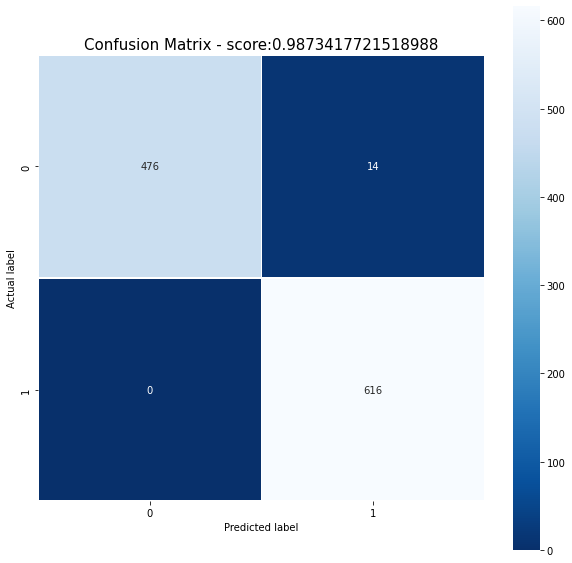

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       490
           1       0.98      1.00      0.99       616

    accuracy                           0.99      1106
   macro avg       0.99      0.99      0.99      1106
weighted avg       0.99      0.99      0.99      1106



In [ ]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train_scaled,y_train)
y_pred=rf_model.predict(X_test_scaled)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

**Gradient Boosting Classifier**

In [ ]:
gbr = GradientBoostingClassifier(n_estimators=20, max_depth=10, max_features=3, random_state=0).fit(X_train_scaled, y_train)
gbr_pred= gbr.score(X_test_scaled, y_test)

gbr_train_accuracy =gbr.score(X_train_scaled,y_train)
gbr_accuracy = gbr.score(X_test_scaled,y_test)
pred_prob_gbr = gbr.predict_proba(X_test_scaled)


print("Training score: {:.3f}".format(gbr.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(gbr.score(X_test_scaled, y_test)))

Training score: 0.986
Test score: 0.968


**Confusion Matrix using Gradient Boosting Classifier**

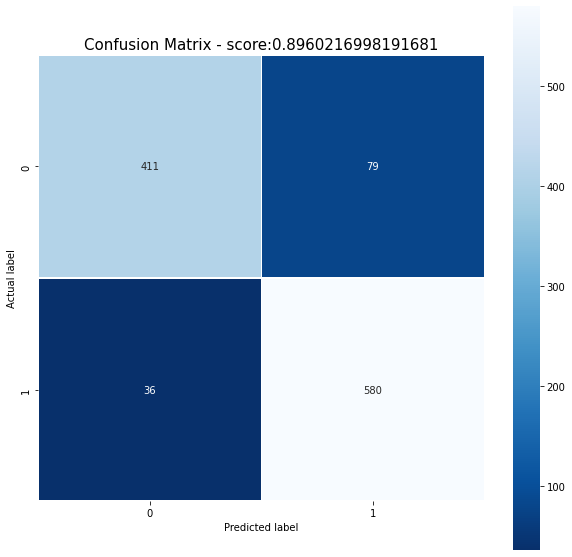

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       490
           1       0.88      0.94      0.91       616

    accuracy                           0.90      1106
   macro avg       0.90      0.89      0.89      1106
weighted avg       0.90      0.90      0.90      1106



In [ ]:
gbr_model=GradientBoostingClassifier(random_state=0)
gbr_model.fit(X_train_scaled,y_train)
y_pred=gbr_model.predict(X_test_scaled)
from sklearn import metrics

gbr_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(gbr_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

**Support Vector Classifier**

In [ ]:
svm = SVC(C=100, gamma=0.001).fit(X_train_scaled, y_train)
svm_pred= svm.score(X_test_scaled, y_test)

svm_train_accuracy =svm.score(X_train_scaled,y_train)
svm_accuracy = svm.score(X_test_scaled,y_test)


print("Training score: {:.3f}".format(svm.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(svm.score(X_test_scaled, y_test)))

Training score: 0.796
Test score: 0.802


**Confusion Matrix using Support Vector Classifier**

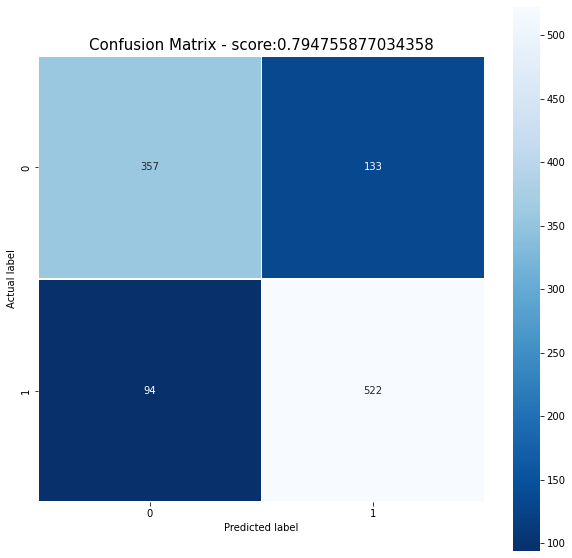

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       490
           1       0.80      0.85      0.82       616

    accuracy                           0.79      1106
   macro avg       0.79      0.79      0.79      1106
weighted avg       0.79      0.79      0.79      1106



In [ ]:
svc_model=SVC(random_state=0)
svc_model.fit(X_train_scaled,y_train)
y_pred=svc_model.predict(X_test_scaled)
from sklearn import metrics

svc_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(svc_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

**KNeighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_pred=knn.score(X_test_scaled, y_test)

knn_train_accuracy =knn.score(X_train_scaled,y_train)
knn_accuracy = knn.score(X_test_scaled,y_test)
pred_prob_knn = knn.predict_proba(X_test_scaled)

print("Training score: {:.3f}".format(knn.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(knn.score(X_test_scaled, y_test)))

Training score: 0.957
Test score: 0.932


**Checking Optimal values of K**

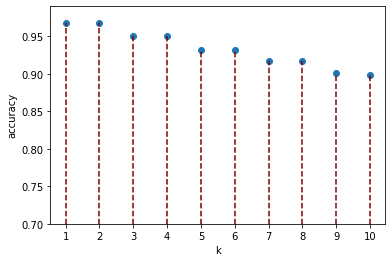

In [ ]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed", colors='maroon')
plt.ylim(0.70,0.99)
plt.xticks([i for i in range(1,11)]);

**Confusion Matrix using KNeighbors Classifier**

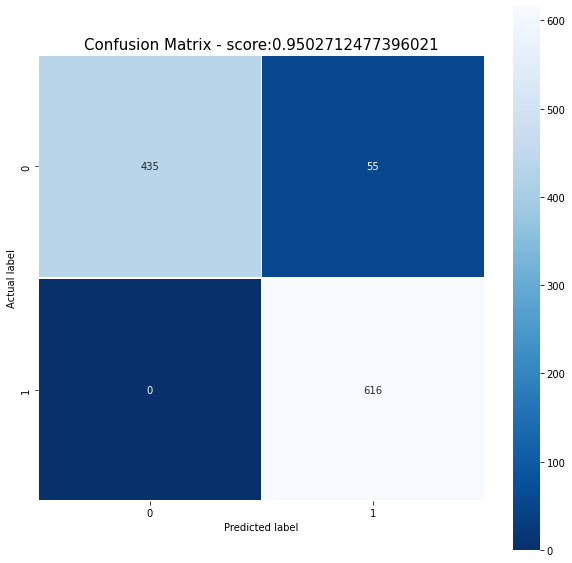

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       490
           1       0.92      1.00      0.96       616

    accuracy                           0.95      1106
   macro avg       0.96      0.94      0.95      1106
weighted avg       0.95      0.95      0.95      1106



In [ ]:
knn_model=KNeighborsClassifier(n_neighbors = 4)
knn_model.fit(X_train_scaled,y_train)
y_pred=knn_model.predict(X_test_scaled)
from sklearn import metrics

knn_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(knn_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

**Xtreme Gradient Boosting Classifier**

In [ ]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train_scaled,y_train)
XB_pred = XB.score(X_test_scaled,y_test)
XB_train_accuracy = XB.score(X_train_scaled,y_train)
pred_prob_XB = XB.predict_proba(X_test_scaled)

print("Training accuracy = ",XB.score(X_train_scaled,y_train))
#Print Test Accuracy
XB_accuracy = XB.score(X_test_scaled,y_test)
print("Testing accuracy = ",XB.score(X_test_scaled,y_test))

Training accuracy =  0.8855462565030536
Testing accuracy =  0.8770343580470162


**Confusion Matrix using Xtreme Gradient Boosting Classifier**

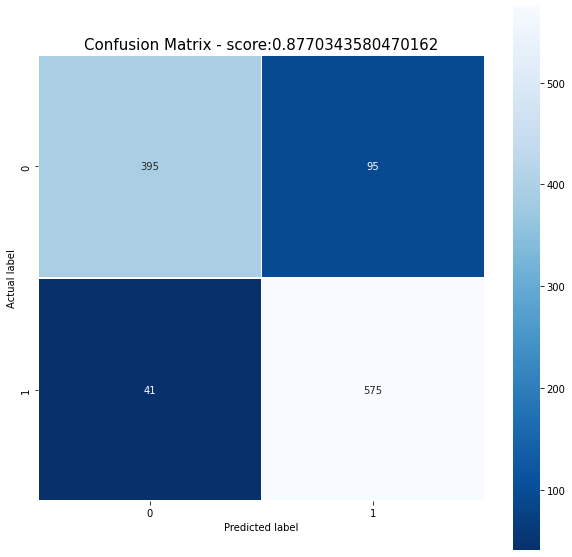

              precision    recall  f1-score   support

           0       0.91      0.81      0.85       490
           1       0.86      0.93      0.89       616

    accuracy                           0.88      1106
   macro avg       0.88      0.87      0.87      1106
weighted avg       0.88      0.88      0.88      1106



In [ ]:
XB_model=xgb.XGBClassifier()
XB_model.fit(X_train_scaled,y_train)
y_pred=XB_model.predict(X_test_scaled)
from sklearn import metrics

XB_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(XB_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

**Gaussian Naive Bayes Classifier**

In [ ]:
#2. Gaussian Naive Bayes Classifier
#t0 = time()
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()
gnb.fit(X_train_scaled,y_train)
gnb_pred = gnb.score(X_test_scaled,y_test)
gnb_train_accuracy = gnb.score(X_train_scaled,y_train)
pred_prob_gnb = gnb.predict_proba(X_test_scaled)

print("Training accuracy = ",gnb.score(X_train_scaled,y_train))
#Print Test Accuracy
gnb_accuracy = gnb.score(X_test_scaled,y_test)
print("Testing accuracy = ",gnb.score(X_test_scaled,y_test))

Training accuracy =  0.8032119429993214
Testing accuracy =  0.7965641952983725


# **Classification Model Comparision**

**Using ROC AUC Curve**

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_log_reg[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_gbr[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob_XB[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob_tree[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob_gnb[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob_log_reg[:,1],multi_class='ovr')
auc_score2 = roc_auc_score(y_test, pred_prob_gbr[:,1],multi_class='ovr')
auc_score3 = roc_auc_score(y_test, pred_prob_knn[:,1],multi_class='ovr')
auc_score4 = roc_auc_score(y_test, pred_prob_XB[:,1],multi_class='ovr')
auc_score5 = roc_auc_score(y_test, pred_prob_tree[:,1],multi_class='ovr')
auc_score6 = roc_auc_score(y_test, pred_prob_rf[:,1],multi_class='ovr')
auc_score7 = roc_auc_score(y_test, pred_prob_gnb[:,1],multi_class='ovr')

print(auc_score1, auc_score2,auc_score3, auc_score4,auc_score5, auc_score6,auc_score7)

0.8869699178372646 0.9901023721176783 0.963265306122449 0.9476659819772065 0.9724489795918367 0.9989646832759078 0.8807845216008481


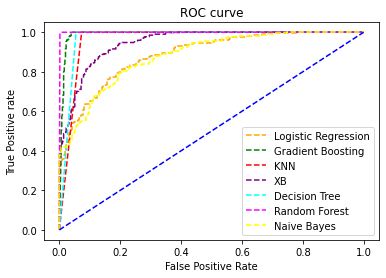

In [ ]:
# plot roc curves
plt.plot(fpr1, tpr1,linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2,linestyle='--',color='green', label='Gradient Boosting')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='KNN')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='XB')
plt.plot(fpr5, tpr5, linestyle='--',color='cyan', label='Decision Tree')
plt.plot(fpr6, tpr6, linestyle='--',color='magenta', label='Random Forest')
plt.plot(fpr7, tpr7, linestyle='--',color='yellow', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

The Area Under Curve is maximum for Random Forest Classifier so it is the best classification model for prediction

**Comparison Table for Models**

In [ ]:
predictions_acc = { "Model": ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVC', 'Logistic Regression','KNeighbors','XGB',"NB"],
"Accuracy": [tree_pred, rf_pred, gbr_pred, svm_pred, log_reg_pred,knn_pred,XB_pred,gnb_pred]}

In [ ]:
model_acc = pd.DataFrame(predictions_acc, columns=["Model", "Accuracy"])

In [ ]:
model_acc

,Model,Accuracy
0,Decision Tree,0.975588
1,Random Forest,0.980108
2,Gradient Boosting,0.968354
3,SVC,0.801989
4,Logistic Regression,0.801989
5,KNeighbors,0.932188
6,XGB,0.877034
7,NB,0.796564


Random Forest Classifier proves to be the best model for Prediction with approx 98% accuracy

In [ ]:
#Average of Prediction of all models
print("Average accuracy : {:.3f}".format(model_acc.Accuracy.mean()))

Average accuracy : 0.892


**Comparing Models using Bar Charts**

In [ ]:
Model_Name = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVC', 'Logistic Regression','KNeighbors','XGB',"NB"]
Accuracy = [tree_pred, rf_pred, gbr_pred, svm_pred, log_reg_pred,knn_pred,XB_pred,gnb_pred]

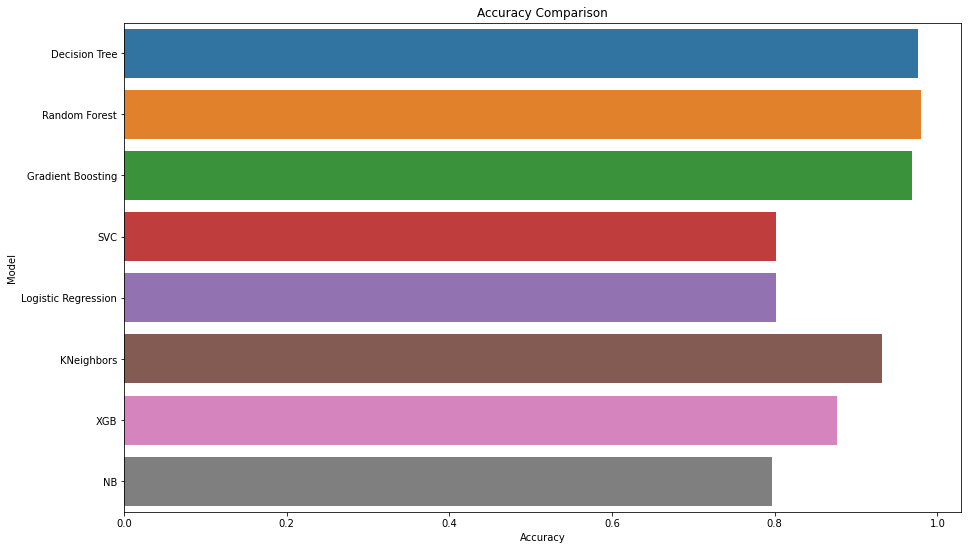

In [ ]:
plt.figure(figsize=(15,9))
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
sns.barplot(x = Accuracy,y = Model_Name)
plt.show()

**Comparison of Training and Tedting Accuracy of all the Models**

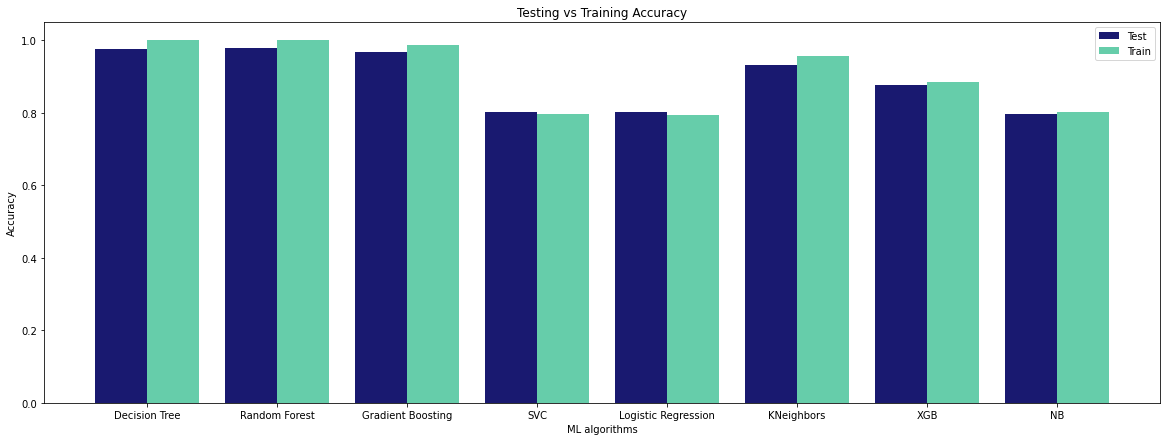

In [ ]:
label = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVC', 'Logistic Regression','KNeighbors','XGB',"NB"]
Test = [tree_accuracy, rf_accuracy, gbr_accuracy, svm_accuracy, log_reg_accuracy,knn_accuracy,XB_accuracy,gnb_accuracy]
Train = [tree_train_accuracy, rf_train_accuracy, gbr_train_accuracy, svm_train_accuracy, log_reg_train_accuracy,knn_train_accuracy,XB_train_accuracy,gnb_train_accuracy]

f, ax = plt.subplots(figsize=(20,7)) # set the size that you'd like (width, height)
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))

plt.xticks(X_axis, label)
plt.xlabel("ML algorithms")
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
#plt.savefig('train vs test.png')
plt.show()

The training and testing accuracy of all the models are nearly same

# **Real Time Prediction**

In [ ]:
y_test_pred = rf_model.predict(X_test_scaled)
print("Accuracy Score of Random Forest:",accuracy_score(y_test,y_test_pred))

Accuracy Score of Random Forest: 0.9873417721518988


In [ ]:
output = pd.DataFrame({'Real_class': y_test, 'Predicted_class': y_pred})
output.head()

,Real_class,Predicted_class
982,0,0
3265,1,1
4256,1,1
1888,0,0
1448,0,0


In [ ]:
prediction= rf_model.predict(np.array([[68,228,36]]))
print( "Person has tendency to get a stroke or not is ", prediction)

Person has tendency to get a stroke or not is  [1]


Here 1 means thta the person can get stroke

# **Stroke Prediction using ANN on Original Data** 

**Using All Features of the Stroke Dataset**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(data['gender'])
df['ever_married']=le.fit_transform(data['ever_married'])
df['work_type']=le.fit_transform(data['work_type'])
df['Residence_type']=le.fit_transform(data['Residence_type'])
df['smoking_status']=le.fit_transform(data['smoking_status'])
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0,1,228.69,36.600000,1,1,1,3,1,0
1,61.0,0,0,202.21,28.893237,1,0,1,4,0,1
2,80.0,0,1,105.92,32.500000,1,1,1,3,0,1
3,49.0,0,0,171.23,34.400000,1,0,1,3,1,2
4,79.0,1,0,174.12,24.000000,1,0,1,4,0,1


In [ ]:
# Features and Label
y=df['stroke']
X=df.drop('stroke',axis=1)
X.shape,y.shape

((3566, 10), (3566,))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state =2)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

In [ ]:
y_train.shape

(2852,)

In [ ]:
y_test.shape

(714,)

In [ ]:
X_train_scaled.shape

(2852, 10)

In [ ]:
X_test_scaled.shape

(714, 10)

In [ ]:
ACCURACY_THRESHOLD = 0.90

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):   
          print("stopping training!!",ACCURACY_THRESHOLD*100)   
          self.model.stop_training = True

callbacks = myCallback()

In [ ]:
#Initialize Sequential model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((10,),input_shape=(10,)))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
#Create optimizer with non-default learning rate
#sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01) 

#Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100,batch_size=20,callbacks=callbacks)

Epoch 1/100
143/143 [==============================] - 2s 6ms/step - loss: 0.5410 - accuracy: 0.7560 - val_loss: 0.3370 - val_accuracy: 0.9356
Epoch 2/100
143/143 [==============================] - 1s 4ms/step - loss: 0.3095 - accuracy: 0.9253 - val_loss: 0.2680 - val_accuracy: 0.9342


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=[]
for i in model.predict(X_test_scaled):
    if i>0.5:
        y_pred.append(1)
    if i<0.5:
        y_pred.append(0)
confusion_matrix(y_test,y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

The accuracy of Original Data using ANN is approx 93%

## **Using Selected Feature For Prediction**

In [ ]:
# Features and Label
y=data['stroke']
X=data[['age','avg_glucose_level','bmi']]
X.shape,y.shape

((3566, 3), (3566,))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state =2)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

In [ ]:
y_train.shape

(2852,)

In [ ]:
y_test.shape

(714,)

In [ ]:
X_train_scaled.shape

(2852, 3)

In [ ]:
X_test_scaled.shape

(714, 3)

In [ ]:
#Initialize Sequential model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((3,),input_shape=(3,)))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
#Create optimizer with non-default learning rate
#sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01) 

#Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100,batch_size=20,callbacks=callbacks)

Epoch 1/100
143/143 [==============================] - 2s 5ms/step - loss: 0.4906 - accuracy: 0.8135 - val_loss: 0.3182 - val_accuracy: 0.9356
Epoch 2/100
143/143 [==============================] - 1s 4ms/step - loss: 0.2799 - accuracy: 0.9386 - val_loss: 0.2447 - val_accuracy: 0.9356


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=[]
for i in model.predict(X_test_scaled):
    if i>0.5:
        y_pred.append(1)
    if i<0.5:
        y_pred.append(0)
confusion_matrix(y_test,y_pred)

array([[668,   0],
       [ 46,   0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9355742296918768

The accuracy of ANN using selected features is approx 94%

# **ANN using Resampled Data**

In [ ]:
target=final[['stroke']]
target

,stroke
0,0
1,0
2,0
3,0
4,0
...,...
5522,1
5523,1
5524,1
5525,1


In [ ]:
feature_final

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_female,gender_male,ever_married_no,ever_married_yes,work_type_children,work_type_govt_job,work_type_never_worked,work_type_private,work_type_self-employed,Residence_type_rural,Residence_type_urban,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,58.0,1,0,87.96,39.2,0,1,0,1,0,0,0,1,0,0,1,0,1,0
1,70.0,0,0,69.04,35.9,1,0,0,1,0,0,0,1,0,1,0,1,0,0
2,32.0,0,0,77.67,32.3,1,0,0,1,0,0,0,1,0,1,0,0,0,1
3,79.0,0,1,57.08,22.0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
4,37.0,0,0,73.50,26.1,1,0,0,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5522,70.0,0,1,239.07,26.1,1,0,0,1,0,0,0,1,0,1,0,0,1,0
5523,57.0,1,0,67.41,32.9,1,0,0,1,0,1,0,0,0,1,0,0,1,0
5524,78.0,0,0,116.10,27.1,0,1,0,1,0,0,0,0,1,0,1,0,1,0
5525,59.0,0,0,86.23,30.0,0,1,0,1,0,0,0,1,0,0,1,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(feature_final,target,test_size = 0.2,random_state =2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled.shape

(4421, 19)

In [ ]:
X_test_scaled.shape

(1106, 19)

In [ ]:
y_train.shape

(4421, 1)

In [ ]:
y_test.shape

(1106, 1)

In [ ]:
#Initialize Sequential model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((19,),input_shape=(19,)))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
#Create optimizer with non-default learning rate
#sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01) 

#Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100,batch_size=20,callbacks=callbacks)

Epoch 1/100
222/222 [==============================] - 3s 5ms/step - loss: 0.4719 - accuracy: 0.7731 - val_loss: 0.4668 - val_accuracy: 0.7676
Epoch 2/100
222/222 [==============================] - 1s 4ms/step - loss: 0.3854 - accuracy: 0.8195 - val_loss: 0.3144 - val_accuracy: 0.8698
Epoch 3/100
222/222 [==============================] - 1s 4ms/step - loss: 0.3574 - accuracy: 0.8453 - val_loss: 0.3024 - val_accuracy: 0.8752
Epoch 4/100
222/222 [==============================] - 1s 4ms/step - loss: 0.3399 - accuracy: 0.8516 - val_loss: 0.2875 - val_accuracy: 0.8852
Epoch 5/100
222/222 [==============================] - 1s 4ms/step - loss: 0.3159 - accuracy: 0.8577 - val_loss: 0.2511 - val_accuracy: 0.9042
Epoch 6/100
222/222 [==============================] - 1s 4ms/step - loss: 0.3135 - accuracy: 0.8634 - val_loss: 0.2573 - val_accuracy: 0.8951
Epoch 7/100
222/222 [==============================] - 1s 4ms/step - loss: 0.3021 - accuracy: 0.8697 - val_loss: 0.2581 - val_accuracy: 0.8897

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=[]
for i in model.predict(X_test_scaled):
    if i>0.5:
        y_pred.append(1)
    if i<0.5:
        y_pred.append(0)
confusion_matrix(y_test,y_pred)

array([[480,  10],
       [604,  12]])

The accuracy using resampled dataset is approx 93%

**Conclusion**

We are getting better accuracythrough Classification Model than Artificial Neural Network

Maximum Accuracy with ANN is approx 94%

We have got 98% accuracy with Random Forest Classifier

Training and testing accuracies are nearly equal using Classification Models


**Insights based on this Project**

It seems that there two underlying groups based on the joint distribution of BMI and glucose level attributes, in a further analysis it may be of interest to understand what distinguishes those two groups from one another.

We saw that a random forest model trained on an upsampled version of the original dataset yielded satisfiable results as for predicting stroke-prone individuals, further analysis should be conducted to ensure that such results are not due to chance or any bais raising during the modeling stage.

We saw that age, BMI, and glucose level are the most important features when it comes to predicting stroke-prone individuals, based on the current dataset.
We observed that women are prone to stroke on average at a much older age (74-79) in comparison to males which experiences strokes on average as soon as their mid 50's and 60, ages which are much rarer for women to have strokes.

Surprisingly when looking at the smoking status of our stroke-positive samples we saw that the majority of the samples have never smoked! and the smallest proportion of the store postive samples are smorkes, indeed a peculiar situation, one would think that smoking will increase the probability of an individual to experience a stroke.